Importing required modules

In [833]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch.utils.data import TensorDataset,random_split,DataLoader
import torch.nn.functional as F
import torch.nn as nn
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

import warnings
import pickle
import os

In [793]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Directory variables

In [831]:
transformed_data_path = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs\transformed_data.pkl"
output_dir = r"C:\Data\Study\Ai_adventures\Projects\Machine_Learning\Regression\DengAi_Disease spread prediction\outputs"

Loading data

In [795]:
def load_transformed_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

In [796]:
data = load_transformed_data(transformed_data_path)
data.head()

,city,day,month,day_of_week,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1,30,4,0,1990,18,-0.016536,-0.045015,0.110036,-0.082612,-0.744185,-0.943302,-1.214591,-1.619633,-1.387852,-0.329611,0.335308,-1.566752,-0.744185,-1.587135,-0.368641,-1.291053,-0.300128,-1.448836,-1.484469,-0.272887,4
1,1,7,5,0,1990,19,0.377020,0.301500,-0.478241,-0.436839,-0.314551,-0.487879,-0.700195,-0.930554,-0.676998,-0.111301,-0.408830,-0.523304,-0.314551,-0.930743,-0.651463,-0.492902,-0.749960,-0.388845,-0.047147,-0.800602,5
2,1,14,5,0,1990,20,-0.792355,0.568155,-0.567387,-0.187652,0.097705,-0.071461,-0.367098,-0.035477,-0.919344,0.354113,0.061403,0.354093,0.097705,-0.045380,-0.738630,-0.492902,-0.645358,-0.133716,0.351279,0.798169,4
3,1,21,5,0,1990,21,0.034186,1.163593,0.537103,0.709611,-0.616682,0.081599,-0.090599,-0.124142,-0.400195,0.187881,-0.685225,0.075074,-0.616682,-0.164520,-0.584496,0.085830,-0.401578,0.476215,0.685422,-1.191951,3
4,1,28,5,0,1990,22,0.592251,1.300171,0.861593,0.847845,-0.967240,0.483642,0.267015,0.263463,-0.152622,0.471071,-0.810182,0.096439,-0.967240,0.215625,-0.025532,1.544761,0.952789,1.553328,1.088514,-1.032905,6


Loading data

In [797]:
X = data.drop(columns=["total_cases"])
y = data["total_cases"]
X.shape, y.shape

((1114, 26), (1114,))

- Creating Tesnor dataset

In [798]:
def Dataset(X,y):
    features = X.to_numpy()
    labels = y.to_numpy()

    features_tensor = torch.tensor(features)
    labels_tensor = torch.tensor(labels,dtype=torch.float32)

    data = TensorDataset(features_tensor,labels_tensor)
    return data

In [799]:
data = Dataset(X,y)
data

In [800]:
len(data)

1114

- Splitting data

In [801]:
train_ds, val_ds = random_split(data,[len(data)-223,223])

- Data Loaders

In [835]:
batch_size = 100

In [802]:
train_dl = DataLoader(train_ds,batch_size,shuffle=True)
val_dl = DataLoader(val_ds,batch_size)
# test_dl = DataLoader(test_ds,batch_size)

In [803]:
for xb,yb in train_dl:
    print(xb,yb)
    break

tensor([[ 1.0000,  1.0000,  4.0000,  ..., -0.9154, -0.0471, -1.5233],
        [ 1.0000,  1.0000,  1.0000,  ..., -1.6612, -0.7697,  0.2418],
        [ 0.0000,  5.0000,  2.0000,  ...,  2.5368, -1.0954,  0.1689],
        ...,
        [ 1.0000, 22.0000,  7.0000,  ..., -0.3888,  0.6854,  0.7867],
        [ 1.0000, 30.0000,  7.0000,  ...,  0.1896,  1.4260, -0.3699],
        [ 1.0000, 28.0000, 10.0000,  ..., -0.6813,  0.6854,  0.1689]],
       dtype=torch.float64) tensor([  3.,  11.,   3.,   5.,  26.,  24.,   8.,  19.,  14.,  17.,   4.,   8.,
         15.,   9.,  35.,   3.,  26.,   6.,   2.,  31.,  32.,  21.,  37.,   6.,
          3.,   3.,  10.,  29.,  17.,   1.,  41.,  22.,  31.,  27.,  20.,  37.,
         67.,  22.,  20.,   4.,   8.,  18.,  11.,   0.,   3.,  10.,   7.,  17.,
         35.,   9.,  12.,   0.,   4.,   6.,  72.,  39.,  17.,  21.,   2.,  14.,
         29.,  16.,   5.,   0.,  55.,   3.,   1.,   1.,  40.,   4.,  19.,  20.,
         68.,  51.,  21.,  10.,  13.,   8.,   5.,  17.,  4

In [804]:
for batch in train_dl:
    features,labels = batch
    print(features.shape,labels)
    break

torch.Size([100, 26]) tensor([  1.,  13.,  12.,  34.,   5.,   2.,  25.,  18.,   0.,  40., 154.,   2.,
         15.,  26.,  33.,   3.,  27.,  11.,  29.,   7.,   1.,   0.,   9.,   1.,
          9.,  11., 116.,  56.,   3.,  34.,   3.,  10.,   6.,   5.,  16.,   6.,
         11., 137.,   8.,   6.,  11.,   0.,   5.,  16.,   1.,  18.,  32.,  21.,
         17.,  29.,  26.,  21.,  19.,   0.,  53.,  47.,  20.,  37.,   0.,  35.,
         12.,   4.,  17.,  34.,  17.,   7.,  18.,   3.,  19.,  29.,   3.,  22.,
          7.,  30.,  34.,   8.,  22.,   2.,  18.,   4.,   3.,   5.,   1.,  15.,
         19.,  38.,  21.,  30., 112.,  31.,  16.,   7.,  38.,   5.,  21.,  62.,
          2., 129.,  51.,   4.])


- Model building 

In [805]:
class LinearRegression(nn.Module):
    def training_step(self, batch):
        features, labels = batch
        outputs = self(features)
        loss = F.l1_loss(outputs, labels, reduction='mean')
        return loss
    
    def validation_step(self, batch):
        features, labels = batch
        outputs = self(features)
        loss = F.l1_loss(outputs, labels, reduction='mean')
        return {"val loss": loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_loss = [x["val loss"] for x in outputs]
        epoch_loss = torch.stack(batch_loss).mean()
        return {"val loss": epoch_loss.item()}

    def epoch_end(self, epoch_num, results, fit_one_cycle=False):
        if epoch_num%2==0:
            if fit_one_cycle:
                print("Epoch [{}], last_lr: {:.5f}, train loss: {:.4f}, val loss: {:.4f}".format(
                    epoch_num, results['lrs'][-1], results['train loss'], results['val loss']))
            else:
                print("Epoch[{}] -> TRAIN LOSS : {:.4f} | VALIDATION LOSS : {:.4f}".format(
                    epoch_num, results["train loss"], results["val loss"]))

    @torch.no_grad()
    def evaluate(self, val_dl):
        self.eval()
        outputs = [self.validation_step(batch) for batch in val_dl]
        return self.validation_epoch_end(outputs)

In [806]:
def linear_block(in_channels, out_channels):
    layers = [
        nn.Linear(in_channels, out_channels),
        nn.BatchNorm1d(out_channels),
        nn.ReLU(inplace=True)
    ]
    return nn.Sequential(*layers)

class NetworkArchitecture(LinearRegression):
    def __init__(self):
        super().__init__()
        self.linear1 = linear_block(len(train_ds[0][0]), 50)
        self.linear2 = linear_block(50, 25)
        self.linear3 = linear_block(25, 10)
        self.classifier = nn.Linear(10, 1)
    
    def forward(self, xb):
        out = self.linear1(xb.float())
        out = self.linear2(out)
        out = self.linear3(out)
        out = self.classifier(out)
        return out   

In [807]:
model_f = NetworkArchitecture()
model_foc = NetworkArchitecture()
model_f

NetworkArchitecture(
  (linear1): Sequential(
    (0): Linear(in_features=26, out_features=50, bias=True)
    (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (linear2): Sequential(
    (0): Linear(in_features=50, out_features=25, bias=True)
    (1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (linear3): Sequential(
    (0): Linear(in_features=25, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (classifier): Linear(in_features=10, out_features=1, bias=True)
)

- Training using fit

In [808]:
def fit(epoch_num,lr,model,train_dl,val_dl,optim_func):
    optimizer = optim_func(model.parameters(),lr)
    history = []
    for epoch in range(epoch_num):
        train_losses = []
        for batch in train_dl:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        results = model.evaluate(val_dl)
        results["train loss"] = torch.stack(train_losses).mean()
        model.epoch_end(epoch,results,fit_one_cycle=False)
        history.append(results)
    return history

In [809]:
model_f.evaluate(val_dl)

{'val loss': 25.880769729614258}

In [810]:
num_epochs = 40
opt_func = torch.optim.Adam
lr = 0.1

In [811]:
history = fit(num_epochs, lr, model_f, train_dl, val_dl, opt_func)

Epoch[0] -> TRAIN LOSS : 71.5632 | VALIDATION LOSS : 21.2898
Epoch[2] -> TRAIN LOSS : 17.5978 | VALIDATION LOSS : 21.3661
Epoch[4] -> TRAIN LOSS : 17.6338 | VALIDATION LOSS : 21.9599
Epoch[6] -> TRAIN LOSS : 17.7144 | VALIDATION LOSS : 21.2448
Epoch[8] -> TRAIN LOSS : 18.1605 | VALIDATION LOSS : 22.1960
Epoch[10] -> TRAIN LOSS : 17.4553 | VALIDATION LOSS : 21.9165
Epoch[12] -> TRAIN LOSS : 17.7972 | VALIDATION LOSS : 21.2399
Epoch[14] -> TRAIN LOSS : 17.4313 | VALIDATION LOSS : 21.3831
Epoch[16] -> TRAIN LOSS : 17.5008 | VALIDATION LOSS : 21.6511
Epoch[18] -> TRAIN LOSS : 17.5067 | VALIDATION LOSS : 22.2016
Epoch[20] -> TRAIN LOSS : 17.5166 | VALIDATION LOSS : 21.6312
Epoch[22] -> TRAIN LOSS : 17.4916 | VALIDATION LOSS : 21.8443
Epoch[24] -> TRAIN LOSS : 17.5724 | VALIDATION LOSS : 21.4409
Epoch[26] -> TRAIN LOSS : 17.5269 | VALIDATION LOSS : 21.4016
Epoch[28] -> TRAIN LOSS : 17.5056 | VALIDATION LOSS : 21.4085
Epoch[30] -> TRAIN LOSS : 17.7044 | VALIDATION LOSS : 21.2477
Epoch[32] -> 

In [812]:
def plot_accuracies(history):
    mae = [x['val loss'] for x in history]
    plt.plot(mae, '-x')
    plt.xlabel('epoch')
    plt.ylabel('mae')
    plt.title('mae vs. No. of epochs');

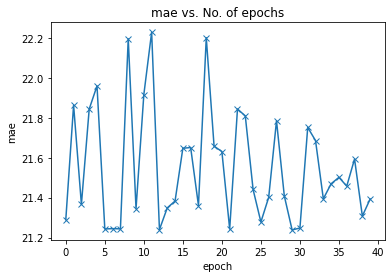

In [813]:
plot_accuracies(history)

In [814]:
def plot_losses(history):
    train_losses = [x.get('train loss').detach().numpy() for x in history]
    val_losses = [x['val loss'].detach().numpy() if isinstance(x['val loss'], torch.Tensor) else x['val loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()

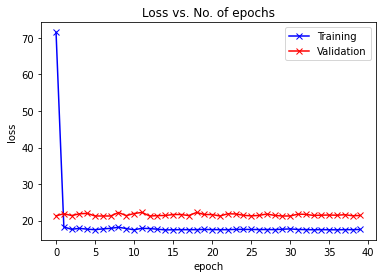

In [815]:
plot_losses(history)

- Training using fit one cycle

In [816]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)

    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs): 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            optimizer.step()
            optimizer.zero_grad()
            lrs.append(get_lr(optimizer))
            sched.step()
        result = model.evaluate(val_loader)
        result['train loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result,fit_one_cycle=True)
        history.append(result)
    return history

In [817]:
history_foc = [model_foc.evaluate(val_dl)]
history_foc

[{'val loss': 26.25972557067871}]

In [818]:
epochs = 40
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [819]:
%%time
history_foc += fit_one_cycle(epochs, max_lr, model_foc,
                         train_dl, val_dl, 
                         grad_clip = grad_clip, 
                         weight_decay = weight_decay, 
                         opt_func = opt_func)

Epoch [0], last_lr: 0.00053, train loss: 23.1773, val loss: 27.2611
Epoch [2], last_lr: 0.00173, train loss: 23.0436, val loss: 24.8262
Epoch [4], last_lr: 0.00388, train loss: 22.7566, val loss: 25.9391
Epoch [6], last_lr: 0.00639, train loss: 22.2716, val loss: 23.1251
Epoch [8], last_lr: 0.00857, train loss: 21.3394, val loss: 21.6400
Epoch [10], last_lr: 0.00983, train loss: 20.0963, val loss: 23.1277
Epoch [12], last_lr: 0.00997, train loss: 18.7093, val loss: 22.1548
Epoch [14], last_lr: 0.00972, train loss: 17.7827, val loss: 21.3523
Epoch [16], last_lr: 0.00923, train loss: 17.4786, val loss: 21.6201
Epoch [18], last_lr: 0.00854, train loss: 17.4701, val loss: 21.3421
Epoch [20], last_lr: 0.00766, train loss: 17.4764, val loss: 21.4841
Epoch [22], last_lr: 0.00665, train loss: 17.4230, val loss: 21.3067
Epoch [24], last_lr: 0.00556, train loss: 17.4403, val loss: 21.3207
Epoch [26], last_lr: 0.00444, train loss: 17.4629, val loss: 21.2949
Epoch [28], last_lr: 0.00335, train los

In [820]:
def plot_accuracies(history):
    accuracies = [x['val loss'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.title('mse vs. No. of epochs');

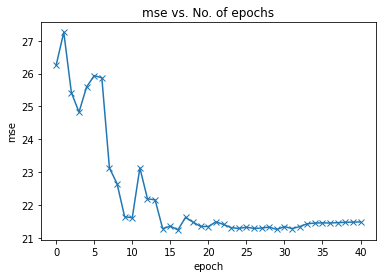

In [821]:
plot_accuracies(history_foc)

In [822]:
def plot_losses(history):
    train_losses = [x.get('train loss') for x in history]
    val_losses = [x['val loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

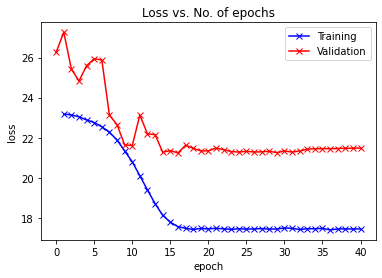

In [823]:
plot_losses(history_foc)

In [824]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

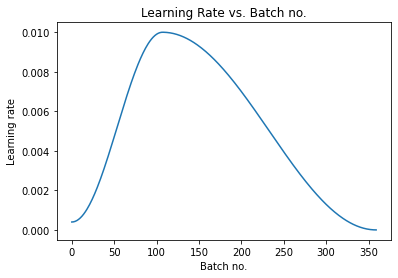

In [825]:
plot_lrs(history_foc)

- Saving the w&b

In [826]:
folder_path = 'C:/Data/Study/Ai_adventures/Projects/Machine_Learning/Regression/DengAi_Disease spread prediction/models/'
torch.save(model_foc.state_dict(), folder_path + 'model_weights.pth')

- Reloading the w&b

In [827]:
model = NetworkArchitecture()

In [828]:
folder_path = 'C:/Data/Study/Ai_adventures/Projects/Machine_Learning/Regression/DengAi_Disease spread prediction/models/'
model_weights_path = folder_path + 'model_weights.pth'
model.load_state_dict(torch.load(model_weights_path))

<All keys matched successfully>

In [829]:
model

NetworkArchitecture(
  (linear1): Sequential(
    (0): Linear(in_features=26, out_features=50, bias=True)
    (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (linear2): Sequential(
    (0): Linear(in_features=50, out_features=25, bias=True)
    (1): BatchNorm1d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (linear3): Sequential(
    (0): Linear(in_features=25, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (classifier): Linear(in_features=10, out_features=1, bias=True)
)

In [863]:
new_data_path = os.path.join(output_dir, "processed_new_data.pkl")
with open(new_data_path, "rb") as file:
    new_processed_data = pickle.load(file)

In [864]:
new_processed_data

array([[ 1.        ,  4.        ,  1.        , ...,  0.47621475,
        -0.37673326,  1.49946502],
       [ 1.        ,  5.        ,  1.        , ..., -1.1866963 ,
        -0.04714703,  0.57625066],
       [ 1.        ,  5.        ,  1.        , ...,  0.18958813,
         0.35127898, -1.28363044],
       ...,
       [ 0.        ,  6.        ,  1.        , ...,  0.07945559,
        -0.44240499,  1.74396776],
       [ 0.        ,  6.        ,  1.        , ..., -0.13371598,
        -0.31098406,  0.56938602],
       [ 0.        ,  6.        ,  1.        , ...,  0.07945559,
        -0.17924068, -0.34357945]])

In [856]:
new_processed_data = torch.tensor(new_processed_data)

In [857]:
test_dl = DataLoader(new_processed_data,batch_size)

In [861]:
for xb in test_dl:
    print(xb.shape)
    break

torch.Size([100, 22])


In [865]:
# model.eval()
# predictions = []
# labels = []
# with torch.no_grad(): 
#     for xb in test_dl:
#         outputs = model(xb)
#         predictions.append(outputs)
        
# # predictions = torch.cat(predictions, dim=0)
# # predictions = predictions.view(-1, 1)  
# # predictions = predictions.to(dtype=float)

# # labels = torch.cat(labels, dim=0)
# predictions